# k-最近傍法(k-NN)

利点：モデルの理解しやすさ、あまり調整しなくてよい、ベースラインとして試す   
欠点：訓練セットが大きくなると予測が遅くなる

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib notebook
%matplotlib inline

In [2]:
# cancerデータセット
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [5]:
# boston_housingデータセット
from sklearn.datasets import load_boston
boston = load_boston()

# 2.3.2.1 k-最近傍法によるクラス分類
一番近い点：最近傍点

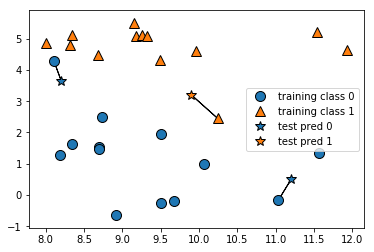

In [6]:
# 1つの近傍点、☆に近い点1つに紐付けられる
# 予測されたくクラスは色で表される
mglearn.plots.plot_knn_classification(n_neighbors=1)

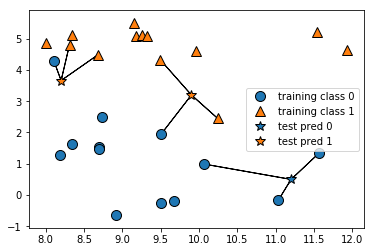

In [8]:
# 3つの近傍点、近い3つの点に紐付けられる
# 予測されたクラスは、多い順
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [10]:
# データを訓練・テストセットに分割
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
# インスタンス生成
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [12]:
# 訓練セットを用いて、クラス分類器を訓練
# KNeighborsClassifier の場合はデータセットを保存するだけ
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [13]:
# predict()メソッドで予測する
# # テストセットに対する予測
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [14]:
# 汎化性能を評価
clf.score(X_test, y_test)

0.8571428571428571

# 2.3.2.2 KNeighborsClassifierの解析
クラス0に割り当てる場合と、クラス1に割り当てる場合の境界：決定境界

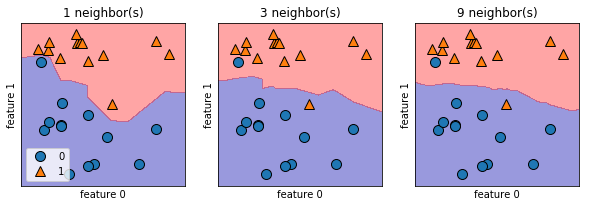

In [15]:
# kが1, 3, 9の場合の決定境界を描画
# kが大きいほどよりなめらかになる
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit()メソッドは自分自身を返すので、1行でインスタンを生成してfitすることができる
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

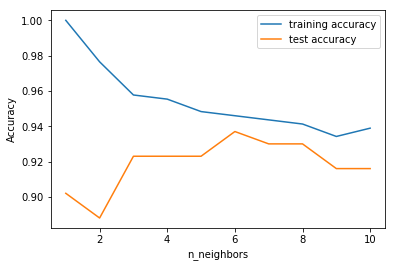

In [18]:
# モデルの複雑さと汎化性能の関係が確認できるか、y軸に精度、x軸に最近傍点の数をプロット
# グラフより、過剰適合と適合不足の特徴は読み取れる
# 最良は6の当たり、訓練精度とテスト精度が高い
# kが大きくなるほど、モデルはシンプルになり精度は低下する

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# n_neighbors を1から10まで試す
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # モデルを構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 訓練セット精度を記録
    training_accuracy.append(clf.score(X_train, y_train))
    # 汎化精度を記録
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# 2.3.2.3 k-近傍回帰

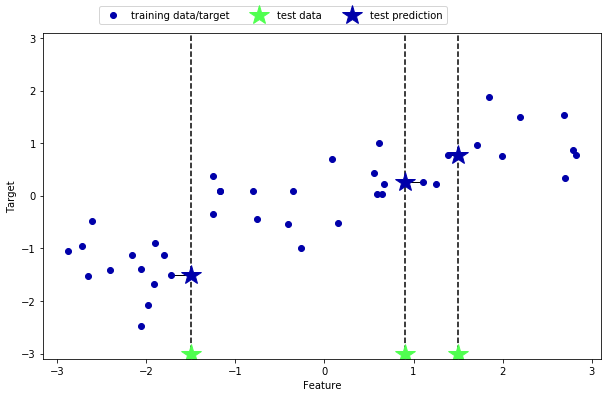

In [22]:
# waveデータセットに対して、k近傍回帰を行う
mglearn.plots.plot_knn_regression(n_neighbors=1)

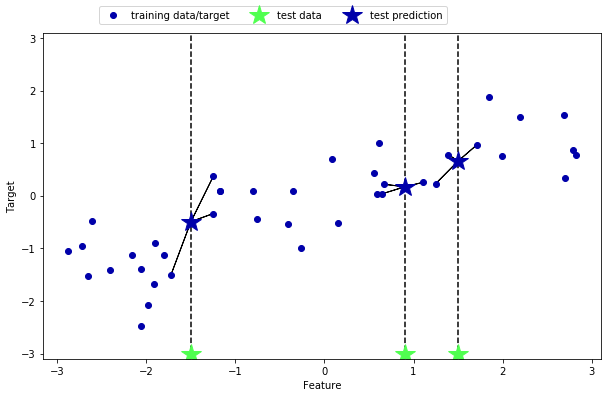

In [23]:
# 複数の場合は最近傍点の平均値を用いる
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [24]:
# sklearnでKNeighborsRegressorクラス
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [25]:
# テストセットに対する精度
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [26]:
# モデルを評価
# R^2スコア（決定係数）を返す、回帰モデルの予測の正確さを測る指標、0~1までの値をとる
reg.score(X_test, y_test)

0.83441724462496036

# 2.3.2.4 KNeighborsRegressorの解析

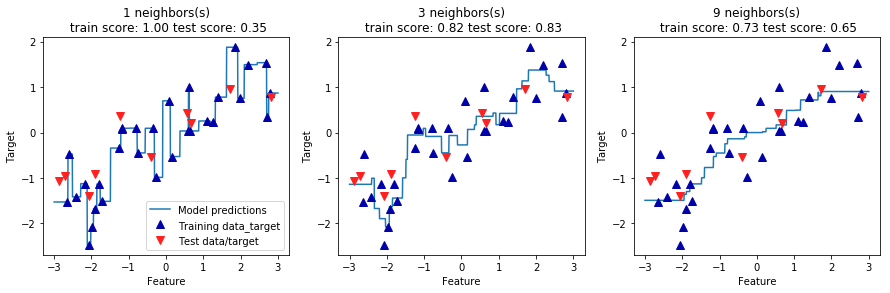

In [28]:
# 1次元のデータセットに対して、すべての値に対する予測値がどのようにあるかを見る
# 1最近傍店による回帰では、予測は全ての訓練データポイントを通っている
#  考慮する最近傍点を増やせば予測はスムーズになるが、訓練データに対する適合度は下がる

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3から3までの間に1,000店のデータポイントを作る
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 近傍点で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbors(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data_target",
                             "Test data/target"], loc="best")